Results for reduced_dataset.csv:
RMSE: 43.09
MAE: 26.16
R²: 0.84
Feature Importance:
  Feature  Importance
0   PM2.5    0.735705
2    PM10    0.097787
4     NOx    0.044249
1     NO2    0.035838
6    tavg    0.033176
5      O3    0.029471
3      NO    0.023775


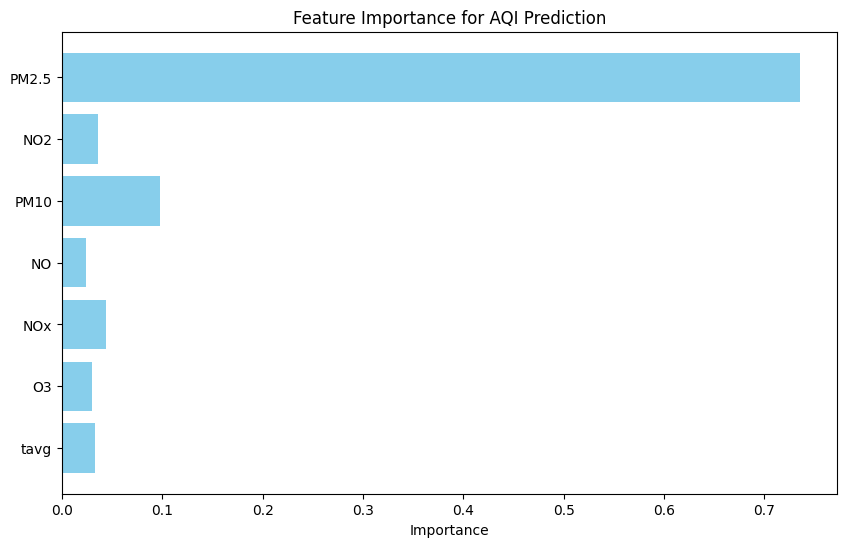

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv("/content/sample_data/reduced_dataset.csv")

# Preprocessing
data = data.dropna(subset=['AQI'])  # Drop rows with missing target
for col in ['PM2.5', 'NO2', 'PM10', 'NO', 'NOx', 'O3', 'tavg']:
    data[col] = data[col].fillna(data[col].median())  # Fill missing predictors

# Define features and target
X = data[['PM2.5', 'NO2', 'PM10', 'NO', 'NOx', 'O3', 'tavg']]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Results
print("Results for reduced_dataset.csv:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")
print("Feature Importance:")
print(importance_df.sort_values(by='Importance', ascending=False))

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for AQI Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()
